In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

# MNIST fashion - CNN

- 2 Conv2D layers
- 1 MaxPooling2D layer
- 1 Dropout(0.25) layer
- 1 Fully Connected Network(512) layer
- 1 Dropout(0.5) layer
- 1 Output layer

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


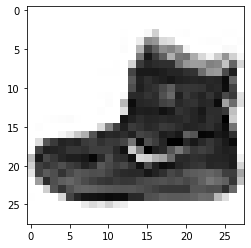

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

In [ ]:
class_name = ['T-Shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
              'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_name[y_train[0]]

'Ankle boot'

## Preprocessing

### Standardization as 0 ~ 1

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Dimensionality expansion

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### One-hot encoding

In [ ]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Processing

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dropout, MaxPooling2D

In [ ]:
model = Sequential([
                    Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'),
                    Conv2D(64, (3, 3), activation = 'relu'),
                    MaxPooling2D(pool_size = 2),
                    Dropout(0.25),
                    Flatten(),  # 2D -> 1D
                    Dense(512, activation = 'relu'),
                    Dropout(0.5),
                    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4719104   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [ ]:
model.compile(
    optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']
)

In [ ]:
modelpath = '/content/drive/MyDrive/colab/2. CNN/Models/best_fashion.h5'
checkpoint = ModelCheckpoint(modelpath, verbose = 1, save_best_only = True)
earlystopping = EarlyStopping(patience = 10)

In [ ]:
history = model.fit(
    X_train, Y_train, validation_split = 0.2, epochs = 50, batch_size = 200,
    verbose = 0, callbacks = [checkpoint, earlystopping]
)


Epoch 00001: val_loss improved from inf to 0.31925, saving model to /content/drive/MyDrive/colab/2. CNN/Models/best_fashion.h5

Epoch 00002: val_loss improved from 0.31925 to 0.26945, saving model to /content/drive/MyDrive/colab/2. CNN/Models/best_fashion.h5

Epoch 00003: val_loss improved from 0.26945 to 0.24265, saving model to /content/drive/MyDrive/colab/2. CNN/Models/best_fashion.h5

Epoch 00004: val_loss improved from 0.24265 to 0.23533, saving model to /content/drive/MyDrive/colab/2. CNN/Models/best_fashion.h5

Epoch 00005: val_loss improved from 0.23533 to 0.22632, saving model to /content/drive/MyDrive/colab/2. CNN/Models/best_fashion.h5

Epoch 00006: val_loss improved from 0.22632 to 0.21051, saving model to /content/drive/MyDrive/colab/2. CNN/Models/best_fashion.h5

Epoch 00007: val_loss improved from 0.21051 to 0.20192, saving model to /content/drive/MyDrive/colab/2. CNN/Models/best_fashion.h5

Epoch 00008: val_loss improved from 0.20192 to 0.20156, saving model to /conten

In [ ]:
from tensorflow.keras.models import load_model
best_model = load_model(modelpath)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2172 - accuracy: 0.9226


[0.21716924011707306, 0.9225999712944031]